In [20]:
import glob
import numpy as np
import pandas as pd

import clima_anom as ca

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

### Used Variables Description
- NPIXELS_XXDBZ: Number of pixels with XX dbz - (20, 30, 40 and 50)
- NPIXELS_XXMM : Number of tmi rain pixels - (20, 30, 40 and 50)
- VOLRAIN_XXDBZ: Volumetric rainfall from area with 20 dBZ (km^2 mm/hr) - (20, 30, 40 and 50)
- VOLRAIN_XXMM: volumetric rain from 2A.PR (km^2 mm/hr) - (20, 30, 40 and 50)
- MINXXPCT: Minimum XX GHz polarization correction TB (K) - (85 and 37)
- NLTXXX: Number of PR pixels with 85 GHz PCT < XXX K (#) - (250 and 225)
- N37LTXXX: Number of pixels with 37 GHz PCT < XXXK (#) - (250 and 225)
- MAXHTXX: Maximum height reached by the feature with XX dBZ (km) - (20, 30 and 40)
- NSTRAT_2A25/NCONV_2A25: Number of pixels with stratiform/convective rainfall (#)
- RAINSTRAT_2A25/RAINCONV_2A25: Stratiform/Convective volumetric rain (mm/hr*km^2)

In [21]:
satellite = 'TRMM'
# satellite = 'GPM'

In [22]:
if satellite == 'TRMM':
    product = 'rpf'
    dir_input = '/mnt/Data/Data/PF/TRMM/rpf/*.HDF'
    out_input = '/mnt/Data/Data/PF/TRMM/rpf_SA/'

    list_var = ['YEAR','ORBIT',
                'NPIXELS_20DBZ', 'NPIXELS_30DBZ','NPIXELS_40DBZ', 'NPIXELS_50DBZ',
                'NPIXELS_20MM', 'NPIXELS_30MM', 'NPIXELS_40MM', 'NPIXELS_50MM',
                'VOLRAIN_20DBZ', 'VOLRAIN_30DBZ', 'VOLRAIN_40DBZ', 'VOLRAIN_50DBZ',
                'VOLRAIN_20MM', 'VOLRAIN_30MM', 'VOLRAIN_40MM', 'VOLRAIN_50MM',
                'MIN85PCT', 'MIN37PCT',
                'NLT250','NLT225',
                'N37LT250','N37LT225',
                'MAXHT20','MAXHT30','MAXHT40',
                'NSTRAT_2A25', 'RAINSTRAT_2A25',
                'NCONV_2A25', 'RAINCONV_2A25']

elif satellite == 'GPM':
    product = 'rgpf'
    dir_input = '/mnt/Data/Data/PF/GPM/rgpf/*.HDF'
    out_input = '/mnt/Data/Data/PF/GPM/rgpf_SA/'

    list_var = ['YEAR','ORBIT',
                'NPIXELS_20DBZ', 'NPIXELS_30DBZ','NPIXELS_40DBZ', 'NPIXELS_50DBZ',
                'NPIXELS_20MM', 'NPIXELS_30MM', 'NPIXELS_40MM', 'NPIXELS_50MM',
                'VOLRAIN_20DBZ', 'VOLRAIN_30DBZ', 'VOLRAIN_40DBZ',
                'VOLRAIN_20MM', 'VOLRAIN_30MM', 'VOLRAIN_40MM',
                'MIN85PCT','NLT250','NLT225','N37LT250','N37LT225',
                'MAXHT20','MAXHT30','MAXHT40',
                'NSTRAT_KU','RAINSTRAT_KU',
                'NCONV_KU','RAINCONV_KU']

else:
    raise ValueError('Invalid satellite')

print(f'Satellite: {satellite}')
print(f'Product  : {product}')
print(f'Directory: {dir_input}')

Satellite: TRMM
Product  : rpf
Directory: /mnt/Data/Data/PF/TRMM/rpf/*.HDF


In [23]:
list_files = glob.glob(dir_input)
list_files = sorted(list_files)
len_files = len(list_files)
print(f'{len_files} files found')
list_files[0:2]

159 files found


['/mnt/Data/Data/PF/TRMM/rpf/pf_200012_level2.HDF',
 '/mnt/Data/Data/PF/TRMM/rpf/pf_200101_level2.HDF']

In [24]:
# data = ca.read_netcdf(list_files[0],2)

In [26]:
for nn in range(len_files):

    file_input = list_files[nn]
    print(file_input)

    data = ca.read_netcdf(file_input,0)
    lat = data['LAT'].data
    lon = data['LON'].data

    data_in = np.zeros([len(lat),len(list_var)])

    for t in range(len(list_var)):
        data_in[:,t] = np.round(data[list_var[t]].data,2)

    pd_in = pd.DataFrame(data_in, columns=list_var)
    pd_in.insert(0, "lat", lat, True)
    pd_in.insert(1, "lon", lon, True)

    # South America Region
    out1 = pd_in[(pd_in['lon'] >= -85) & (pd_in['lon'] <= -30 )]
    out2 = out1[(out1['lat'] >= -45) & (out1['lat'] <= 15 )]

    # export dataframe to csv
    salida = out_input + file_input.split('/')[-1].replace('.HDF','.csv').replace('pf',product)
    print(f'Exporting data to {salida}')
    out2.to_csv(salida,header=True,index=False)

    print()

/mnt/Data/Data/PF/TRMM/rpf/pf_200012_level2.HDF
Exporting data to /mnt/Data/Data/PF/TRMM/rpf_SA/rpf_200012_level2.csv

/mnt/Data/Data/PF/TRMM/rpf/pf_200101_level2.HDF
Exporting data to /mnt/Data/Data/PF/TRMM/rpf_SA/rpf_200101_level2.csv

/mnt/Data/Data/PF/TRMM/rpf/pf_200102_level2.HDF
Exporting data to /mnt/Data/Data/PF/TRMM/rpf_SA/rpf_200102_level2.csv

/mnt/Data/Data/PF/TRMM/rpf/pf_200103_level2.HDF
Exporting data to /mnt/Data/Data/PF/TRMM/rpf_SA/rpf_200103_level2.csv

/mnt/Data/Data/PF/TRMM/rpf/pf_200104_level2.HDF
Exporting data to /mnt/Data/Data/PF/TRMM/rpf_SA/rpf_200104_level2.csv

/mnt/Data/Data/PF/TRMM/rpf/pf_200105_level2.HDF
Exporting data to /mnt/Data/Data/PF/TRMM/rpf_SA/rpf_200105_level2.csv

/mnt/Data/Data/PF/TRMM/rpf/pf_200106_level2.HDF
Exporting data to /mnt/Data/Data/PF/TRMM/rpf_SA/rpf_200106_level2.csv

/mnt/Data/Data/PF/TRMM/rpf/pf_200107_level2.HDF
Exporting data to /mnt/Data/Data/PF/TRMM/rpf_SA/rpf_200107_level2.csv

/mnt/Data/Data/PF/TRMM/rpf/pf_200108_level2.HDF


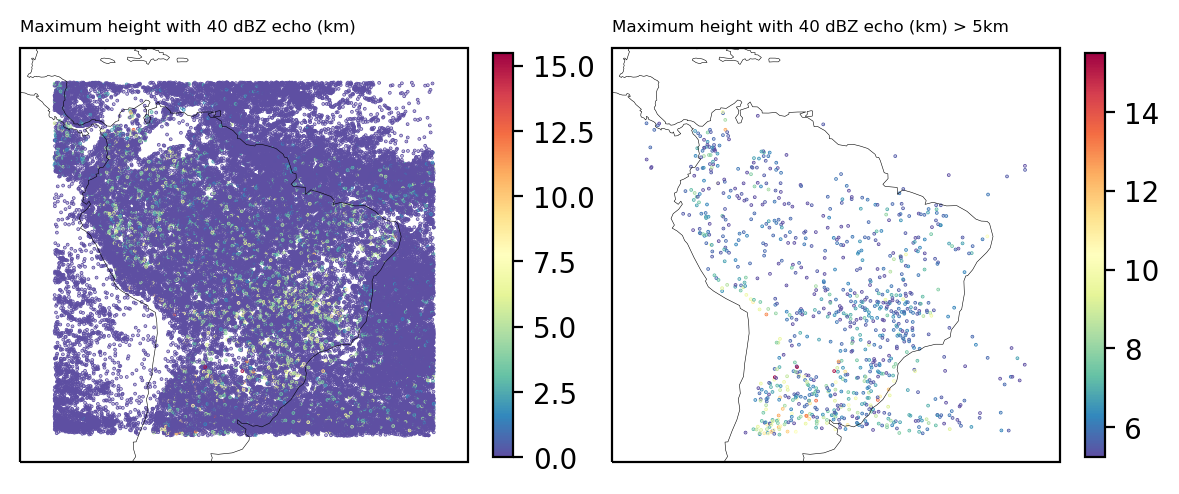

In [37]:
alt_ref = 5

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

levels = np.arange(0,15,3)

fig = plt.figure(figsize=(7,4),dpi=200)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-90,-25,-40,20],crs=proj)
a1 = ax1.scatter(out2['lon'],out2['lat'],c=out2['MAXHT40'],cmap=cmap,s=0.1,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km)',fontsize=6,loc='left')
plt.colorbar(a1,fraction=0.041)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-90,-25,-40,20],crs=proj)
a1 = ax1.scatter(out2['lon'][out2['MAXHT40']>alt_ref],out2['lat'][out2['MAXHT40']>alt_ref],c=out2['MAXHT40'][out2['MAXHT40']>alt_ref],cmap=cmap,s=0.1,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref)+'km',fontsize=6,loc='left')
plt.colorbar(a1,fraction=0.041)